<a href="https://colab.research.google.com/github/Abugahh/Abugahh/blob/main/Final_Equity_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Dependancies

In [ ]:
!pip install camelot-py[cv]

In [ ]:
!sudo apt-get install ghostscript-x

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript libgs9
  libgs9-common libidn12 libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript
  ghostscript-x libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  poppler-data
0 upgraded, 11 newly installed, 0 to remove and 45 not upgraded.
Need to get 16.8 MB of archives.
After this operation, 63.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-droid-fallback all 1:6.0.1r16-1.1buil

In [ ]:
!pip install PyPDF2==1.26.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61083 sha256=0e01895905b09c864fe412514113549c89ab1e796c4389238c5e59bfe4f393ea
  Stored in directory: /root/.cache/pip/wheels/3a/62/ec/b6dea0b680005e9a961a3b195adb5f550b9586e92d20aed01d
Successfully built PyPDF2
  Attempting uninstall: PyPDF2
    Found existing installation: PyPDF2 3.0.1
    Uninstalling PyPDF2-3.0.1:
      Successfully uninstalled PyPDF2-3.0.1


### Extraction

In [ ]:
# import camelot

# file = "Statement.pdf"

# tables = camelot.read_pdf(file, pages='1-end')

# print("Number of extracted tables:", len(tables))


import camelot


file = "Statement.pdf"

try:
    # Use Camelot to read tables from all pages
    tables = camelot.read_pdf(file, pages='all', flavor='stream')

    print("Number of extracted tables:", len(tables))

    # tables is a list of Table objects. Each table can be converted to a dataframe.
    for i, table in enumerate(tables):
        df = table.df  # convert table to dataframe
        print(f"Table {i+1}:")
        print(df)
        print("\n---\n")
except Exception as e:
    print(f"An error occurred: {e}")




Number of extracted tables: 7


KeyboardInterrupt: 

In [ ]:
!pip install --upgrade camelot

  Using cached Camelot-12.06.29.tar.gz (3.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached SQLAlchemy-0.7.10.tar.gz (3.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached Elixir-0.7.1.tar.gz (47 kB)
  Preparing metadata (setup.py) ... done
  Using cached sqlalchemy_migrate-0.13.0-py2.py3-none-any.whl (109 kB)
  Using cached xlwt-0.7.2.zip (131 kB)
  Preparing metadata (setup.py) ... done
  Using cached xlrd-0.7.1.zip (125 kB)
  Preparing metadata (setup.py) ... done
  Using cached pbr-6.0.0-py2.py3-none-any.whl (107 kB)
INFO: pip is looking at multiple versions of sqlalchemy-migrate to determine which version is compatible with other requirements. This could take a while.
  Using cached sqlalchemy_migrate-0.12.0-py2.py3-none-any.whl (108 kB)
  Using cached sqlalchemy-migrate-0.11.0.tar.gz (128 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error origi

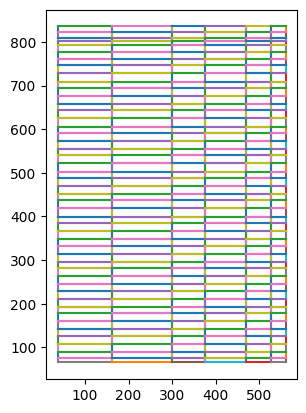

In [ ]:
tables = camelot.read_pdf('Statement.pdf', flavor= 'stream', pages = 'all')
camelot.plot(tables[2], kind='grid').show()

In [ ]:
import camelot


file = "Statement.pdf"

try:

    tables = camelot.read_pdf(file, flavor='stream', row_tol=20, pages= "all")

    print("Number of extracted tables:", len(tables))

    # tables is a list of Table objects. Each table can be converted to a dataframe.
    for i, table in enumerate(tables):
        df = table.df  # convert table to dataframe
        print(f"Table {i+1}:")
        print(df)
        print("\n---\n")
except Exception as e:
    print(f"An error occurred: {e}")

Number of extracted tables: 7
Table 1:
                                         0                               1  \
0                                  Account        Account Number\nCurrency   
1                                Statement  Account Branch\nStatement Date   
2                      NELSON KAMAU MWANGI               Statement\nPeriod   
3  254714165105\nnelsonmwangi197@gmail.com                 Account Created   

                         2  
0       0420180193669\nKES  
1          042\n19/04/2024  
2  19/04/2023 - 19/04/2024  
3               14/10/2020  

---

Table 2:
                                                    0                  1  \
0                                        Transactions                      
1   Transaction Details\nPAYMENT FROM NELSON KAMAU...  Payment reference   
2                          682147377069\n682147377069           54302441   
3             NELSON KAMAU MWANGI MPESA\n682153318668           54355390   
4                             

In [ ]:
import pandas as pd

# Combine all dataframes from the second table onwards ignoring the first one
combined_df = pd.concat([table.df for table in tables[1:]], ignore_index=True)


combined_df

,0,1,2,3,4,5
0,Transactions,,,,,
1,Transaction Details,Payment reference,Value Date,Credit (Money In),Debit (Money Out),Balance
2,PAYMENT FROM NELSON KAMAU MWANGI,,,,,
3,682147377069,54302441,22/04/2023,"2,000.00",,"2,017.60"
4,682147377069,,,,,
...,...,...,...,...,...,...
243,EQ703265375046,,,,,
244,APP/MPESA/254711345166/703265375046/ NELSON KAMAU,,,,,
245,703265375046,54568521,22/12/2023,,14.16,09.31
246,EQ703265375046,,,,,


In [ ]:
import camelot
import pandas as pd

def extract_and_group_tables(pdf_file):
    # Read all tables from the PDF
    tables = camelot.read_pdf(pdf_file, flavor='stream', row_tol=20, pages='1-end')

    # Initialize an empty list to store cleaned DataFrames
    cleaned_tables = []

    for i, table in enumerate(tables):
        # Convert the table to a DataFrame
        df = table.df

        # Assuming the first row contains column names (headers)
        # Exclude the first row (header) from the DataFrame
        df = df.iloc[1:]

        # Process the remaining DataFrame (df) as needed
        # (e.g., group rows, aggregate data, etc.)

        # Append the cleaned DataFrame to the list
        cleaned_tables.append(df)

    return cleaned_tables

if __name__ == "__main__":
    pdf_file_path = "Statement.pdf"
    cleaned_tables_list = extract_and_group_tables(pdf_file_path)

    # Print the cleaned tables (excluding headers)
    for i, cleaned_df in enumerate(cleaned_tables_list):
        print(f"Cleaned Table {i+1}:")
        print(cleaned_df)
        print("\n---\n")


Cleaned Table 1:
                                         0                               1  \
1                                Statement  Account Branch\nStatement Date   
2                      NELSON KAMAU MWANGI               Statement\nPeriod   
3  254714165105\nnelsonmwangi197@gmail.com                 Account Created   

                         2  
1          042\n19/04/2024  
2  19/04/2023 - 19/04/2024  
3               14/10/2020  

---

Cleaned Table 2:
                                                    0                  1  \
1   Transaction Details\nPAYMENT FROM NELSON KAMAU...  Payment reference   
2                          682147377069\n682147377069           54302441   
3             NELSON KAMAU MWANGI MPESA\n682153318668           54355390   
4                                      EQ682153318668                      
5                  MOBILE MONEY CHARGES\n682153318668           54355390   
6                                      EQ682153318668                      

In [ ]:
import camelot
import pandas as pd

def extract_dark_and_light_rows(pdf_file):
    # Read the PDF using Camelot
    tables = camelot.read_pdf(pdf_file, flavor='stream', row_tol=20)

    # Assuming there's only one table on the page (you can adjust as needed)
    df = tables[0].df

    # Create empty lists for dark and light rows
    dark_rows = []
    light_rows = []

    # Assuming background color information is in the first column (adjust as needed)
    for _, row in df.iterrows():
        background_color = row[0].get("background", None)
        if background_color == "dark":
            dark_rows.append(row)
        else:
            light_rows.append(row)

    # Process dark and light rows as needed
    # (e.g., concatenate text within dark rows to form sentences)

    return dark_rows, light_rows

if __name__ == "__main__":
    pdf_file_path = "your_pdf.pdf"
    dark_rows, light_rows = extract_dark_and_light_rows(pdf_file_path)

    # Example: Print the first few rows from each group
    print("Dark Rows:")
    print(pd.DataFrame(dark_rows))
    print("\nLight Rows:")
    print(pd.DataFrame(light_rows))


using latiice

In [ ]:
import camelot


file = "Statement.pdf"

try:
    # Use Camelot to read tables from all pages
    tables = camelot.read_pdf ( file, pages='all',flavor='lattice')


    print("Number of extracted tables:", len(tables))

    # tables is a list of Table objects. Each table can be converted to a dataframe.
    for i, table in enumerate(tables):
        df = table.df  # convert table to dataframe
        print(f"Table {i+1}:")
        print(df)
        print("\n---\n")
except Exception as e:
    print(f"An error occurred: {e}")

Number of extracted tables: 0


In [ ]:
import camelot


file = "Statement.pdf"

try:
    # Use Camelot to read tables from all pages
    tables = camelot.read_pdf ( file, pages='all',process_background=True, flavor='lattice', line_scale=40, copy_text=['v'], strip_text='\n')


    print("Number of extracted tables:", len(tables))

    # tables is a list of Table objects. Each table can be converted to a dataframe.
    for i, table in enumerate(tables):
        df = table.df  # convert table to dataframe
        print(f"Table {i+1}:")
        print(df)
        print("\n---\n")
except Exception as e:
    print(f"An error occurred: {e}")

Number of extracted tables: 41
Table 1:
                                                   0         1           2 3  \
0  NELSON KAMAU MWANGI MPESA682153318668EQ6821533...  54355390  22/04/2023     

        4         5  
0  200.00  1,817.60  

---

Table 2:
                                                   0        1           2 3  \
0  NELSON KAMAU MWANGI MPESA682249764434EQ6822497...  5480219  23/04/2023     

        4         5  
0  100.00  1,706.40  

---

Table 3:
                                                0         1           2 3  \
0  MOBILE MONEY CHARGES682319966291EQ682319966291  54281992  24/04/2023     

       4       5  
0  16.00  190.40  

---

Table 4:
                                                0         1           2 3  \
0  MOBILE MONEY CHARGES683021415510EQ683021415510  54715877  02/05/2023     

       4      5  
0  11.20  09.20  

---

Table 5:
                                                   0         1           2  \
0  MPS 254711345166 RI671RWAIT

In [ ]:
import pandas as pd

# Combine all dataframes from the second table onwards ignoring the first one
combined_df = pd.concat([table.df for table in tables[1:]], ignore_index=True)


combined_df

,0,1,2,3,4,5
0,NELSON KAMAU MWANGI MPESA682249764434EQ6822497...,5480219,23/04/2023,,100.00,"1,706.40"
1,MOBILE MONEY CHARGES682319966291EQ682319966291,54281992,24/04/2023,,16.00,190.40
2,MOBILE MONEY CHARGES683021415510EQ683021415510,54715877,02/05/2023,,11.20,09.20
3,MPS 254711345166 RI671RWAIT Nelson Kamau Mwang...,S4931593,06/09/2023,200.00,,206.94
4,Transaction Details,Payment reference,Value Date,Credit (Money In),Debit (Money Out),Balance
5,NELSON KAMAU MWANGI MPESA694078679035EQ6940786...,54181931,07/09/2023,,500.00,"2,506.94"
6,SAMUEL MWANGI KAMAU MPESA694167070326EQ6941670...,54194144,08/09/2023,,200.00,"2,292.78"
7,254111298912 MPESA694178403328EQ694178403328,54313605,08/09/2023,,350.00,"1,928.62"
8,MORINE WANGARI WARIBU MPESA694265042950EQ69426...,54261669,09/09/2023,,200.00,"1,714.46"
9,NELSON KAMAU MWANGI MPESA694273321771EQ6942733...,54317078,09/09/2023,,500.00,"1,200.30"


In [ ]:
tables

<TableList n=3>

using both

In [ ]:
import pandas as pd

# Use Camelot to read tables from all pages with 'lattice'
tables_lattice = camelot.read_pdf(file, pages='all', process_background=True, flavor='lattice')

# Use Camelot to read tables from all pages with 'stream'
tables_stream = camelot.read_pdf(file, pages='all', flavor='stream')

# Convert TableList to list and then concatenate
tables = list(tables_lattice) + list(tables_stream)

# Process the tables
for i, table in enumerate(tables):
    df = table.df  # convert table to dataframe
    print(f"Table {i+1}:")
    print(df)
    print("\n---\n")


Table 1:
                                                   0                  1  \
0                                Transaction Details  Payment reference   
1  NELSON KAMAU MWANGI MPESA\n694078679035\nEQ694...           54181931   

            2                  3                  4         5  
0  Value Date  Credit (Money In)  Debit (Money Out)   Balance  
1  07/09/2023                                500.00  2,506.94  

---

Table 2:
                                                   0                  1  \
0                                Transaction Details  Payment reference   
1  NELSON KAMAU MWANGI MPESA\n702217628756\nEQ702...           54187006   

            2                  3                  4         5  
0  Value Date  Credit (Money In)  Debit (Money Out)   Balance  
1  10/12/2023                              1,000.00  9,175.78  

---

Table 3:
                                                   0                  1  \
0                                Transaction Detai

adding strip to explain to camelot

In [ ]:
import camelot

file = "Statement.pdf"

try:
    # Use Camelot to read tables from all pages
    # tables = camelot.read_pdf(file, pages='all', flavor='stream', strip_text=' \n')
    tables = camelot.read_pdf(file, flavor='stream', table_areas=['316,499,600,337'], columns=['316,447,569'], split_text=True)

    print("Number of extracted tables:", len(tables))

    # tables is a list of Table objects. Each table can be converted to a dataframe.
    for i, table in enumerate(tables):
        df = table.df  # convert table to dataframe
        print(f"Table {i+1}:")
        print(df)
        print("\n---\n")
except Exception as e:
    print(f"An error occurred: {e}")


Number of extracted tables: 1
Table 1:
  0           1                 2 3
0    23/04/2023  100.00\n1,706.40  
1    24/04/2023  1,500.00\n206.40  
2    24/04/2023     16.00\n190.40  

---



In [ ]:
tables = camelot.read_pdf('Statement.pdf', process_background=True, flavor='lattice', pages='all')

tables[10].df

IndexError: list index out of range

In [ ]:
from PyPDF2 import PdfFileReader

def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf = PdfFileReader(file)
        text = ""
        for page_number in range(pdf.getNumPages()):
            text += pdf.getPage(page_number).extractText()
        return text

file = "Statement.pdf"
text = extract_text_from_pdf(file)
print(text)


### Mergeing the dataframes

In [ ]:
## Step one: remove the columns for each dataframes as when concatinating before each table/df had its own column from extraction
## Step two: concatinate from the second tables as the first one is irrelevant


import pandas as pd

# Combine all dataframes from the second table onwards ignoring the first one
combined_df = pd.concat([table.df for table in tables[1:]], ignore_index=True)


combined_df




,0,1,2,3,4,5
0,Transactions,,,,,
1,Transaction Details,Payment reference,Value Date,Credit (Money In),Debit (Money Out),Balance
2,PAYMENT FROM NELSON KAMAU MWANGI,,,,,
3,682147377069,54302441,22/04/2023,"2,000.00",,"2,017.60"
4,682147377069,,,,,
...,...,...,...,...,...,...
243,EQ703265375046,,,,,
244,APP/MPESA/254711345166/703265375046/ NELSON KAMAU,,,,,
245,703265375046,54568521,22/12/2023,,14.16,09.31
246,EQ703265375046,,,,,


In [ ]:
# Drop the first row
combined_df = combined_df.iloc[1:]

In [ ]:
# Set the first row as the column names
combined_df.columns = combined_df.iloc[0]

# Drop the first row again, as it's now the column names
combined_df = combined_df.iloc[1:]

# Reset the index
combined_df.reset_index(drop=True, inplace=True)

In [ ]:
# Now combined_df is a single dataframe that contains all the data from the second table onwards
combined_df


1,Transaction Details,Payment reference,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,,,,,
1,682147377069,54302441,22/04/2023,"2,000.00",,"2,017.60"
2,682147377069,,,,,
3,NELSON KAMAU MWANGI MPESA,,,,,
4,682153318668,54355390,22/04/2023,,200.00,"1,817.60"
...,...,...,...,...,...,...
241,EQ703265375046,,,,,
242,APP/MPESA/254711345166/703265375046/ NELSON KAMAU,,,,,
243,703265375046,54568521,22/12/2023,,14.16,09.31
244,EQ703265375046,,,,,


In [ ]:
combined_df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,NaN,NaN,NaN,NaN
1,682147377069,22/04/2023,"2,000.00",NaN,"2,017.60"
2,682147377069,NaN,NaN,NaN,NaN
3,NELSON KAMAU MWANGI MPESA,NaN,NaN,NaN,NaN
4,682153318668,22/04/2023,NaN,200.00,"1,817.60"
...,...,...,...,...,...
239,APP/MPESA/254711345166/703265375046/ NELSON KAMAU,NaN,NaN,NaN,NaN
240,703265375046,22/12/2023,NaN,150.00,23.47
242,APP/MPESA/254711345166/703265375046/ NELSON KAMAU,NaN,NaN,NaN,NaN
243,703265375046,22/12/2023,NaN,14.16,09.31


In [ ]:
import pandas as pd

# Assuming you have your cleaned DataFrame 'combined_df'
# (with columns: 'Transaction Details', 'Value Date', 'Credit (Money In)', 'Debit (Money Out)', 'Balance')

# Initialize an empty list for grouped rows
grouped_rows = []
current_group = []

# Calculate row spacing (difference in row indices)
combined_df['Row_Index'] = combined_df.index
combined_df['Row_Spacing'] = combined_df['Row_Index'].diff()

# Define the spacing threshold (20 units in this example)
spacing_threshold = 20

# Iterate through rows
for _, row in combined_df.iterrows():
    if row['Row_Spacing'] <= spacing_threshold:
        # Add to the current group
        current_group.append(row)
    else:
        # Start a new group
        if current_group:
            grouped_rows.append(current_group)
        current_group = [row]

# Add the last group (if any)
if current_group:
    grouped_rows.append(current_group)

# Example: Print the content of each group
for i, group in enumerate(grouped_rows):
    print(f"Group {i + 1}:")
    for row in group:
        print(row['Transaction Details'], row['Value Date'], row['Credit (Money In)'], row['Debit (Money Out)'], row['Balance'])
    print("---")


In [ ]:
combined_df.to_csv('equity.csv', index=False)

In [ ]:
## removing the redundant columns got from combining each dataframe to one from the tables


import pandas as pd

# Assuming 'combined_df' is your DataFrame
combined_df = combined_df[~((combined_df['Transaction Details'] == 'Transaction Details')
                            & (combined_df['Payment reference'] == 'Payment reference')
                            & (combined_df['Value Date'] == 'Value Date')
                            & (combined_df['Credit (Money In)'] == 'Credit (Money In)')
                            & (combined_df['Debit (Money Out)'] == 'Debit (Money Out)')
                            & (combined_df['Balance'] == 'Balance'))]


In [ ]:
combined_df.to_csv('equity2.csv', index=False)

In [ ]:
combined_df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,NaN,NaN,NaN,NaN
1,682147377069,22/04/2023,"2,000.00",NaN,"2,017.60"
2,682147377069,NaN,NaN,NaN,NaN
3,NELSON KAMAU MWANGI MPESA,NaN,NaN,NaN,NaN
4,682153318668,22/04/2023,NaN,200.00,"1,817.60"
...,...,...,...,...,...
239,APP/MPESA/254711345166/703265375046/ NELSON KAMAU,NaN,NaN,NaN,NaN
240,703265375046,22/12/2023,NaN,150.00,23.47
242,APP/MPESA/254711345166/703265375046/ NELSON KAMAU,NaN,NaN,NaN,NaN
243,703265375046,22/12/2023,NaN,14.16,09.31


In [ ]:
pr

In [ ]:
combined_df.head()

1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,,,,
1,PAYMENT FROM NELSON KAMAU MWANGI,22/04/2023,"2,000.00",,"2,017.60"
2,PAYMENT FROM NELSON KAMAU MWANGI,,,,
3,NELSON KAMAU MWANGI MPESA,,,,
4,NELSON KAMAU MWANGI MPESA,22/04/2023,,200.00,"1,817.60"


In [ ]:
# prompt: Using dataframe combined_df: viewing the no of rows and column

print(combined_df.shape)


(241, 6)


###Further Cleaning

In [ ]:
##dropping refrence column
combined_df.head()


1,Transaction Details,Payment reference,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,,,,,
1,682147377069,54302441,22/04/2023,"2,000.00",,"2,017.60"
2,682147377069,,,,,
3,NELSON KAMAU MWANGI MPESA,,,,,
4,682153318668,54355390,22/04/2023,,200.00,"1,817.60"


In [ ]:
#dropping the particulers column
#edit the date format, and column names

combined_df.drop('Payment reference', axis=1, inplace=True)


In [ ]:
combined_df.head(80)

1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,,,,
1,682147377069,22/04/2023,"2,000.00",,"2,017.60"
2,682147377069,,,,
3,NELSON KAMAU MWANGI MPESA,,,,
4,682153318668,22/04/2023,,200.00,"1,817.60"
...,...,...,...,...,...
76,EQ694359554398,,,,
77,NELSON KAMAU MWANGI MPESA,,,,
78,694430905263,11/09/2023,,200.00,557.82
79,EQ694430905263,,,,


In [ ]:
# Remove rows with 'Transaction Details' matching the format 'EQ682153318668'
combined_df = combined_df[~combined_df['Transaction Details'].str.contains(r'EQ\d{12}', regex=True)]

NameError: name 'combined_df' is not defined

In [ ]:
combined_df.head()

1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,,,,
1,682147377069,22/04/2023,"2,000.00",,"2,017.60"
2,682147377069,,,,
3,NELSON KAMAU MWANGI MPESA,,,,
4,682153318668,22/04/2023,,200.00,"1,817.60"


In [ ]:
##concatination
import pandas as pd
import numpy as np

# Replace empty strings with NaN
combined_df.replace('', np.nan, inplace=True)

# Print the DataFrame
print(combined_df)

1                                  Transaction Details  Value Date  \
0                     PAYMENT FROM NELSON KAMAU MWANGI         NaN   
1                                         682147377069  22/04/2023   
2                                         682147377069         NaN   
3                            NELSON KAMAU MWANGI MPESA         NaN   
4                                         682153318668  22/04/2023   
..                                                 ...         ...   
239  APP/MPESA/254711345166/703265375046/ NELSON KAMAU         NaN   
240                                       703265375046  22/12/2023   
242  APP/MPESA/254711345166/703265375046/ NELSON KAMAU         NaN   
243                                       703265375046  22/12/2023   
245                                              Total         NaN   

1   Credit (Money In) Debit (Money Out)   Balance  
0                 NaN               NaN       NaN  
1            2,000.00               NaN  2,017.60  
2  

In [ ]:
combined_df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,NaN,NaN,NaN,NaN
1,682147377069,22/04/2023,"2,000.00",NaN,"2,017.60"
2,682147377069,NaN,NaN,NaN,NaN
3,NELSON KAMAU MWANGI MPESA,NaN,NaN,NaN,NaN
4,682153318668,22/04/2023,NaN,200.00,"1,817.60"


Different scenarios

In [ ]:
df = combined_df.copy()

# Remove rows with 'Transaction Details' matching the format 'EQ682153318668'
df = df[~df['Transaction Details'].str.contains(r'EQ\d{12}', regex=True)]

In [ ]:
# Filter out the specific number
df = df[df['Transaction Details'] != '682147377069']

# Drop the rows with NaN values in the specified columns
columns_to_check = ['Value Date', 'Credit (Money In)', 'Debit (Money Out)', 'Balance']
df = df.dropna(subset=columns_to_check)


In [ ]:
df.head(500)

1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance


In [ ]:
print(df)

1                                  Transaction Details  Value Date  \
0                     PAYMENT FROM NELSON KAMAU MWANGI               
1                                         682147377069  22/04/2023   
2                                         682147377069               
3                            NELSON KAMAU MWANGI MPESA               
4                                         682153318668  22/04/2023   
..                                                 ...         ...   
239  APP/MPESA/254711345166/703265375046/ NELSON KAMAU               
240                                       703265375046  22/12/2023   
242  APP/MPESA/254711345166/703265375046/ NELSON KAMAU               
243                                       703265375046  22/12/2023   
245                                              Total               

1   Credit (Money In) Debit (Money Out)   Balance  
0                                                  
1            2,000.00                    2,017.60  
2  

In [ ]:
df.to_csv('cleaned.csv', index=False)

In [ ]:
##concatination
import pandas as pd
import numpy as np

# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)

# Print the DataFrame
print(df)


1                                  Transaction Details  Value Date  \
0                     PAYMENT FROM NELSON KAMAU MWANGI         NaN   
1                                         682147377069  22/04/2023   
2                                         682147377069         NaN   
3                            NELSON KAMAU MWANGI MPESA         NaN   
4                                         682153318668  22/04/2023   
..                                                 ...         ...   
239  APP/MPESA/254711345166/703265375046/ NELSON KAMAU         NaN   
240                                       703265375046  22/12/2023   
242  APP/MPESA/254711345166/703265375046/ NELSON KAMAU         NaN   
243                                       703265375046  22/12/2023   
245                                              Total         NaN   

1   Credit (Money In) Debit (Money Out)   Balance  
0                 NaN               NaN       NaN  
1            2,000.00               NaN  2,017.60  
2  

In [ ]:
df_5 = df.copy()
# Create a new column 'Combined Transaction Details' that concatenates 'Transaction Details' of the current row with the 'Transaction Details' of the next row
df_5['Combined Transaction Details'] = df_5['Transaction Details'] + ' ' + df_5['Transaction Details'].shift(-1)

# # Remove rows where 'Value Date', 'Credit (Money In)', 'Debit (Money Out)', or 'Balance' is NaN
# df_3 = df_3.dropna(subset=['Value Date', 'Credit (Money In)', 'Debit (Money Out)', 'Balance'])

# Print the DataFrame
print(df_5)

1                                  Transaction Details  Value Date  \
0                     PAYMENT FROM NELSON KAMAU MWANGI         NaN   
1                                         682147377069  22/04/2023   
2                                         682147377069         NaN   
3                            NELSON KAMAU MWANGI MPESA         NaN   
4                                         682153318668  22/04/2023   
..                                                 ...         ...   
239  APP/MPESA/254711345166/703265375046/ NELSON KAMAU         NaN   
240                                       703265375046  22/12/2023   
242  APP/MPESA/254711345166/703265375046/ NELSON KAMAU         NaN   
243                                       703265375046  22/12/2023   
245                                              Total         NaN   

1   Credit (Money In) Debit (Money Out)   Balance  \
0                 NaN               NaN       NaN   
1            2,000.00               NaN  2,017.60   


In [ ]:
df_5.tail()

1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance,Combined Transaction Details
239,APP/MPESA/254711345166/703265375046/ NELSON KAMAU,NaN,NaN,NaN,NaN,APP/MPESA/254711345166/703265375046/ NELSON KA...
240,703265375046,22/12/2023,NaN,150.00,23.47,703265375046 APP/MPESA/254711345166/7032653750...
242,APP/MPESA/254711345166/703265375046/ NELSON KAMAU,NaN,NaN,NaN,NaN,APP/MPESA/254711345166/703265375046/ NELSON KA...
243,703265375046,22/12/2023,NaN,14.16,09.31,703265375046 Total
245,Total,NaN,"19,200.00","19,208.29",09.31,NaN


In [ ]:
df_5.to_csv('data.csv', index= False)

Last scenario

In [ ]:
df_f = combined_df.copy()

import pandas as pd


df_f['Transaction Details'] = df_f['Transaction Details'].fillna(method='ffill')

# Now, you can drop the rows where 'Value Date', 'Credit (Money In)', 'Debit (Money Out)', 'Balance' are all null
df_f = df_f.dropna(subset=['Value Date', 'Credit (Money In)', 'Debit (Money Out)', 'Balance'], how='all')


In [ ]:
df_f.head()

1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
1,682147377069,22/04/2023,"2,000.00",NaN,"2,017.60"
4,682153318668,22/04/2023,NaN,200.00,"1,817.60"
7,682153318668,22/04/2023,NaN,11.20,"1,806.40"
10,682249764434,23/04/2023,NaN,100.00,"1,706.40"
13,682319966291,24/04/2023,NaN,"1,500.00",206.40


In [ ]:
df_2 = df.copy()

# Forward fill the 'Transaction Details' column
df_2['Transaction Details'] = df_2['Transaction Details'].ffill()

print(df_2)

# # Create a new DataFrame that drops the rows with NaN in 'Value Date', 'Credit (Money In)', 'Debit (Money Out)', and 'Balance'
# new_df = df.dropna(subset=['Value Date', 'Credit (Money In)', 'Debit (Money Out)', 'Balance'])

# # Print the new DataFrame
# print(new_df)

1                                  Transaction Details  Value Date  \
0                     PAYMENT FROM NELSON KAMAU MWANGI         NaN   
1                                         682147377069  22/04/2023   
2                                         682147377069         NaN   
3                            NELSON KAMAU MWANGI MPESA         NaN   
4                                         682153318668  22/04/2023   
..                                                 ...         ...   
239  APP/MPESA/254711345166/703265375046/ NELSON KAMAU         NaN   
240                                       703265375046  22/12/2023   
242  APP/MPESA/254711345166/703265375046/ NELSON KAMAU         NaN   
243                                       703265375046  22/12/2023   
245                                              Total         NaN   

1   Credit (Money In) Debit (Money Out)   Balance  
0                 NaN               NaN       NaN  
1            2,000.00               NaN  2,017.60  
2  

In [ ]:
df_2.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,NaN,NaN,NaN,NaN
1,682147377069,22/04/2023,"2,000.00",NaN,"2,017.60"
2,682147377069,NaN,NaN,NaN,NaN
3,NELSON KAMAU MWANGI MPESA,NaN,NaN,NaN,NaN
4,682153318668,22/04/2023,NaN,200.00,"1,817.60"


In [ ]:
df_1 = df.copy()

# Shift 'Transaction Details' up by one row
df_1['Shifted Transaction Details'] = df_1['Transaction Details'].shift(-1)

# Concatenate 'Transaction Details' with 'Shifted Transaction Details'
df_1['Combined Transaction Details'] = df_1['Transaction Details'] + ' ' + df['Shifted Transaction Details']

# Print the DataFrame
print(df_1)


In [ ]:

df_trial = combined_df.copy()


import pandas as pd

pattern = r'EQ\d{12}|\d{12}'
mask = ~df_trial['Transaction Details'].str.contains(pattern)
df_trial = df_trial[mask]


In [ ]:
df_trial.columns

Index(['Transaction Details', 'Value Date', 'Credit (Money In)',
       'Debit (Money Out)', 'Balance'],
      dtype='object', name=1)

In [ ]:
df_trial.head()

1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,,,,
3,NELSON KAMAU MWANGI MPESA,,,,
6,MOBILE MONEY CHARGES,,,,
9,NELSON KAMAU MWANGI MPESA,,,,
12,NELSON KAMAU MWANGI MPESA,,,,


In [ ]:
df_trial_2 = combined_df.copy()

import pandas as pd
import numpy as np

# Assuming df is your DataFrame and 'column' is the column with the numbers
pattern = r'EQ\d{12}|\d{12}'
mask = ~df_trial_2['Transaction Details'].str.contains(pattern)
df_trial_2 = df_trial_2[mask]

# Shift the data upwards
df_trial_2 = df_trial_2.apply(lambda x: pd.Series(x.dropna().values))

# Reset the index
df_trial_2.reset_index(drop=True, inplace=True)


In [ ]:
df_trial_2.head()

1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,,,,
1,NELSON KAMAU MWANGI MPESA,,,,
2,MOBILE MONEY CHARGES,,,,
3,NELSON KAMAU MWANGI MPESA,,,,
4,NELSON KAMAU MWANGI MPESA,,,,


In [ ]:
combined_df.head()

1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,,,,
1,682147377069,22/04/2023,"2,000.00",,"2,017.60"
2,682147377069,,,,
3,NELSON KAMAU MWANGI MPESA,,,,
4,682153318668,22/04/2023,,200.00,"1,817.60"


In [ ]:
df_trial_3 = combined_df.copy()
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and 'column' is the column with the numbers
pattern = r'EQ\d{12}|\d{12}'

# Replace unwanted values with NaN
df_trial_3.loc[df_trial_3['Transaction Details'].str.contains(pattern), 'Transaction Details'] = np.nan

# Forward fill the NaN values
df_trial_3['Transaction Details'].fillna(method='ffill', inplace=True)


In [ ]:
df_trial_3.head()

1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,,,,
1,PAYMENT FROM NELSON KAMAU MWANGI,22/04/2023,"2,000.00",,"2,017.60"
2,PAYMENT FROM NELSON KAMAU MWANGI,,,,
3,NELSON KAMAU MWANGI MPESA,,,,
4,NELSON KAMAU MWANGI MPESA,22/04/2023,,200.00,"1,817.60"


In [ ]:
print(df_trial_3)

1                 Transaction Details  Value Date Credit (Money In)  \
0    PAYMENT FROM NELSON KAMAU MWANGI                                 
1    PAYMENT FROM NELSON KAMAU MWANGI  22/04/2023          2,000.00   
2    PAYMENT FROM NELSON KAMAU MWANGI                                 
3           NELSON KAMAU MWANGI MPESA                                 
4           NELSON KAMAU MWANGI MPESA  22/04/2023                     
..                                ...         ...               ...   
241          TRANSACTION + SMS CHARGE                                 
242          TRANSACTION + SMS CHARGE                                 
243          TRANSACTION + SMS CHARGE  22/12/2023                     
244          TRANSACTION + SMS CHARGE                                 
245                             Total                     19,200.00   

1   Debit (Money Out)   Balance  
0                                
1                      2,017.60  
2                                
3          

In [ ]:

df_trial_3.to_csv('data.csv', index=False)

In [ ]:
df_trial_4=combined_df

import pandas as pd
import numpy as np

# # Assuming df is your DataFrame and 'column' is the column with the numbers
# pattern = r'EQ\d{12}'
# mask = ~df_trial_4['Transaction Details'].str.contains(pattern)
# df_trial_4 = df_trial_4[mask]

# Shift the data upwards
df_trial_4 = df_trial_4.apply(lambda x: pd.Series(x.dropna().values))

# Reset the index
df_trial_4.reset_index(drop=True, inplace=True)


In [ ]:
df_trial_4.head()

1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,22/04/2023,"2,000.00",200.00,"2,017.60"
1,682147377069,22/04/2023,200.00,11.20,"1,817.60"
2,682147377069,22/04/2023,"2,800.00",100.00,"1,806.40"
3,NELSON KAMAU MWANGI MPESA,23/04/2023,"10,000.00","1,500.00","1,706.40"
4,682153318668,24/04/2023,"2,500.00",16.00,206.40


In [ ]:
df_trial_4.to_csv('yoo.csv')

In [ ]:
combined_df.head()

1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,,,,
1,PAYMENT FROM NELSON KAMAU MWANGI,22/04/2023,"2,000.00",,"2,017.60"
2,PAYMENT FROM NELSON KAMAU MWANGI,,,,
3,NELSON KAMAU MWANGI MPESA,,,,
4,NELSON KAMAU MWANGI MPESA,22/04/2023,,200.00,"1,817.60"


In [ ]:
df_trial_5 = combined_df.copy()
import pandas as pd


# Specify the columns you want to fill
columns_to_fill = ['Value Date', 'Credit (Money In)', 'Debit (Money Out)', 'Balance']

# Use ffill to fill the empty cells
df_trial_5[columns_to_fill] = df_trial_5[columns_to_fill].ffill()

print(df_trial_5)


1                                  Transaction Details  Value Date  \
0                     PAYMENT FROM NELSON KAMAU MWANGI               
1                                         682147377069  22/04/2023   
2                                         682147377069               
3                            NELSON KAMAU MWANGI MPESA               
4                                         682153318668  22/04/2023   
..                                                 ...         ...   
241                                     EQ703265375046               
242  APP/MPESA/254711345166/703265375046/ NELSON KAMAU               
243                                       703265375046  22/12/2023   
244                                     EQ703265375046               
245                                              Total               

1   Credit (Money In) Debit (Money Out)   Balance  
0                                                  
1            2,000.00                    2,017.60  
2  

In [ ]:
df_trial_5.head(100)

1,Transaction Details,Value Date,Credit (Money In),Debit (Money Out),Balance
0,PAYMENT FROM NELSON KAMAU MWANGI,,,,
1,682147377069,22/04/2023,"2,000.00",,"2,017.60"
2,682147377069,,,,
3,NELSON KAMAU MWANGI MPESA,,,,
4,682153318668,22/04/2023,,200.00,"1,817.60"
...,...,...,...,...,...
97,NELSON KAMAU MWANGI MPESA,,,,
98,694680522124,14/09/2023,,100.00,43.66
99,EQ694680522124,,,,
100,MPS 254711345166 RKS6N0XOR4 Nelson Kamau Mwang...,,,,


converting to HTML

In [ ]:
!sudo apt-get install pdf2htmlEX


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package pdf2htmlEX


In [ ]:
!pdf2htmlEX Statement.pdf


/bin/bash: line 1: pdf2htmlEX: command not found


In [ ]:
# Convert PDF to TXT
pdftotext your_file.pdf